In [1]:
# adp 21회 회귀분석 
# 연속형 독립변수 x1 ~ x10 
# 데이터 8:2로 분할하고 
# 선형회귀 적용하여 결정계수와 RMSE 산출
# 릿지 회귀 적용 (alpha 값을 0부터 1까지 0.1단위로 모두 탐색하여 결정계수가
# 가장 높을때의 알파값을 찾고, 해당 알파로 다시 모델을 학습하여 
# 결정계수와 RMSE 산출)
# 라쏘 회귀로 동일하게 수행

In [2]:
### 적용가능한 데이터가 없어서 
### 회귀분석용 데이터 가공
### (캐글 house-prices-advanced-regression-techniques)

In [59]:
import pandas as pd

a = pd.read_csv('data/train_house-prices-advanced-regression-techniques.csv')

a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [60]:
### 분석용 연속형 변수 x1 ~ x10 추출 
### X1 : SalePrice
### x2 ~ x10 

#df['x2','x3','x4','x5','x6','x7','x8','x9','x10'] = a['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BedroomAbvGr','KitchenAbvGr','SalePrice']

df = a[['SalePrice','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BedroomAbvGr','KitchenAbvGr','PoolArea']]
df.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1460 non-null   int64  
 1   x2      1201 non-null   float64
 2   x3      1460 non-null   int64  
 3   x4      1460 non-null   int64  
 4   x5      1460 non-null   int64  
 5   x6      1460 non-null   int64  
 6   x7      1460 non-null   int64  
 7   x8      1460 non-null   int64  
 8   x9      1460 non-null   int64  
 9   x10     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


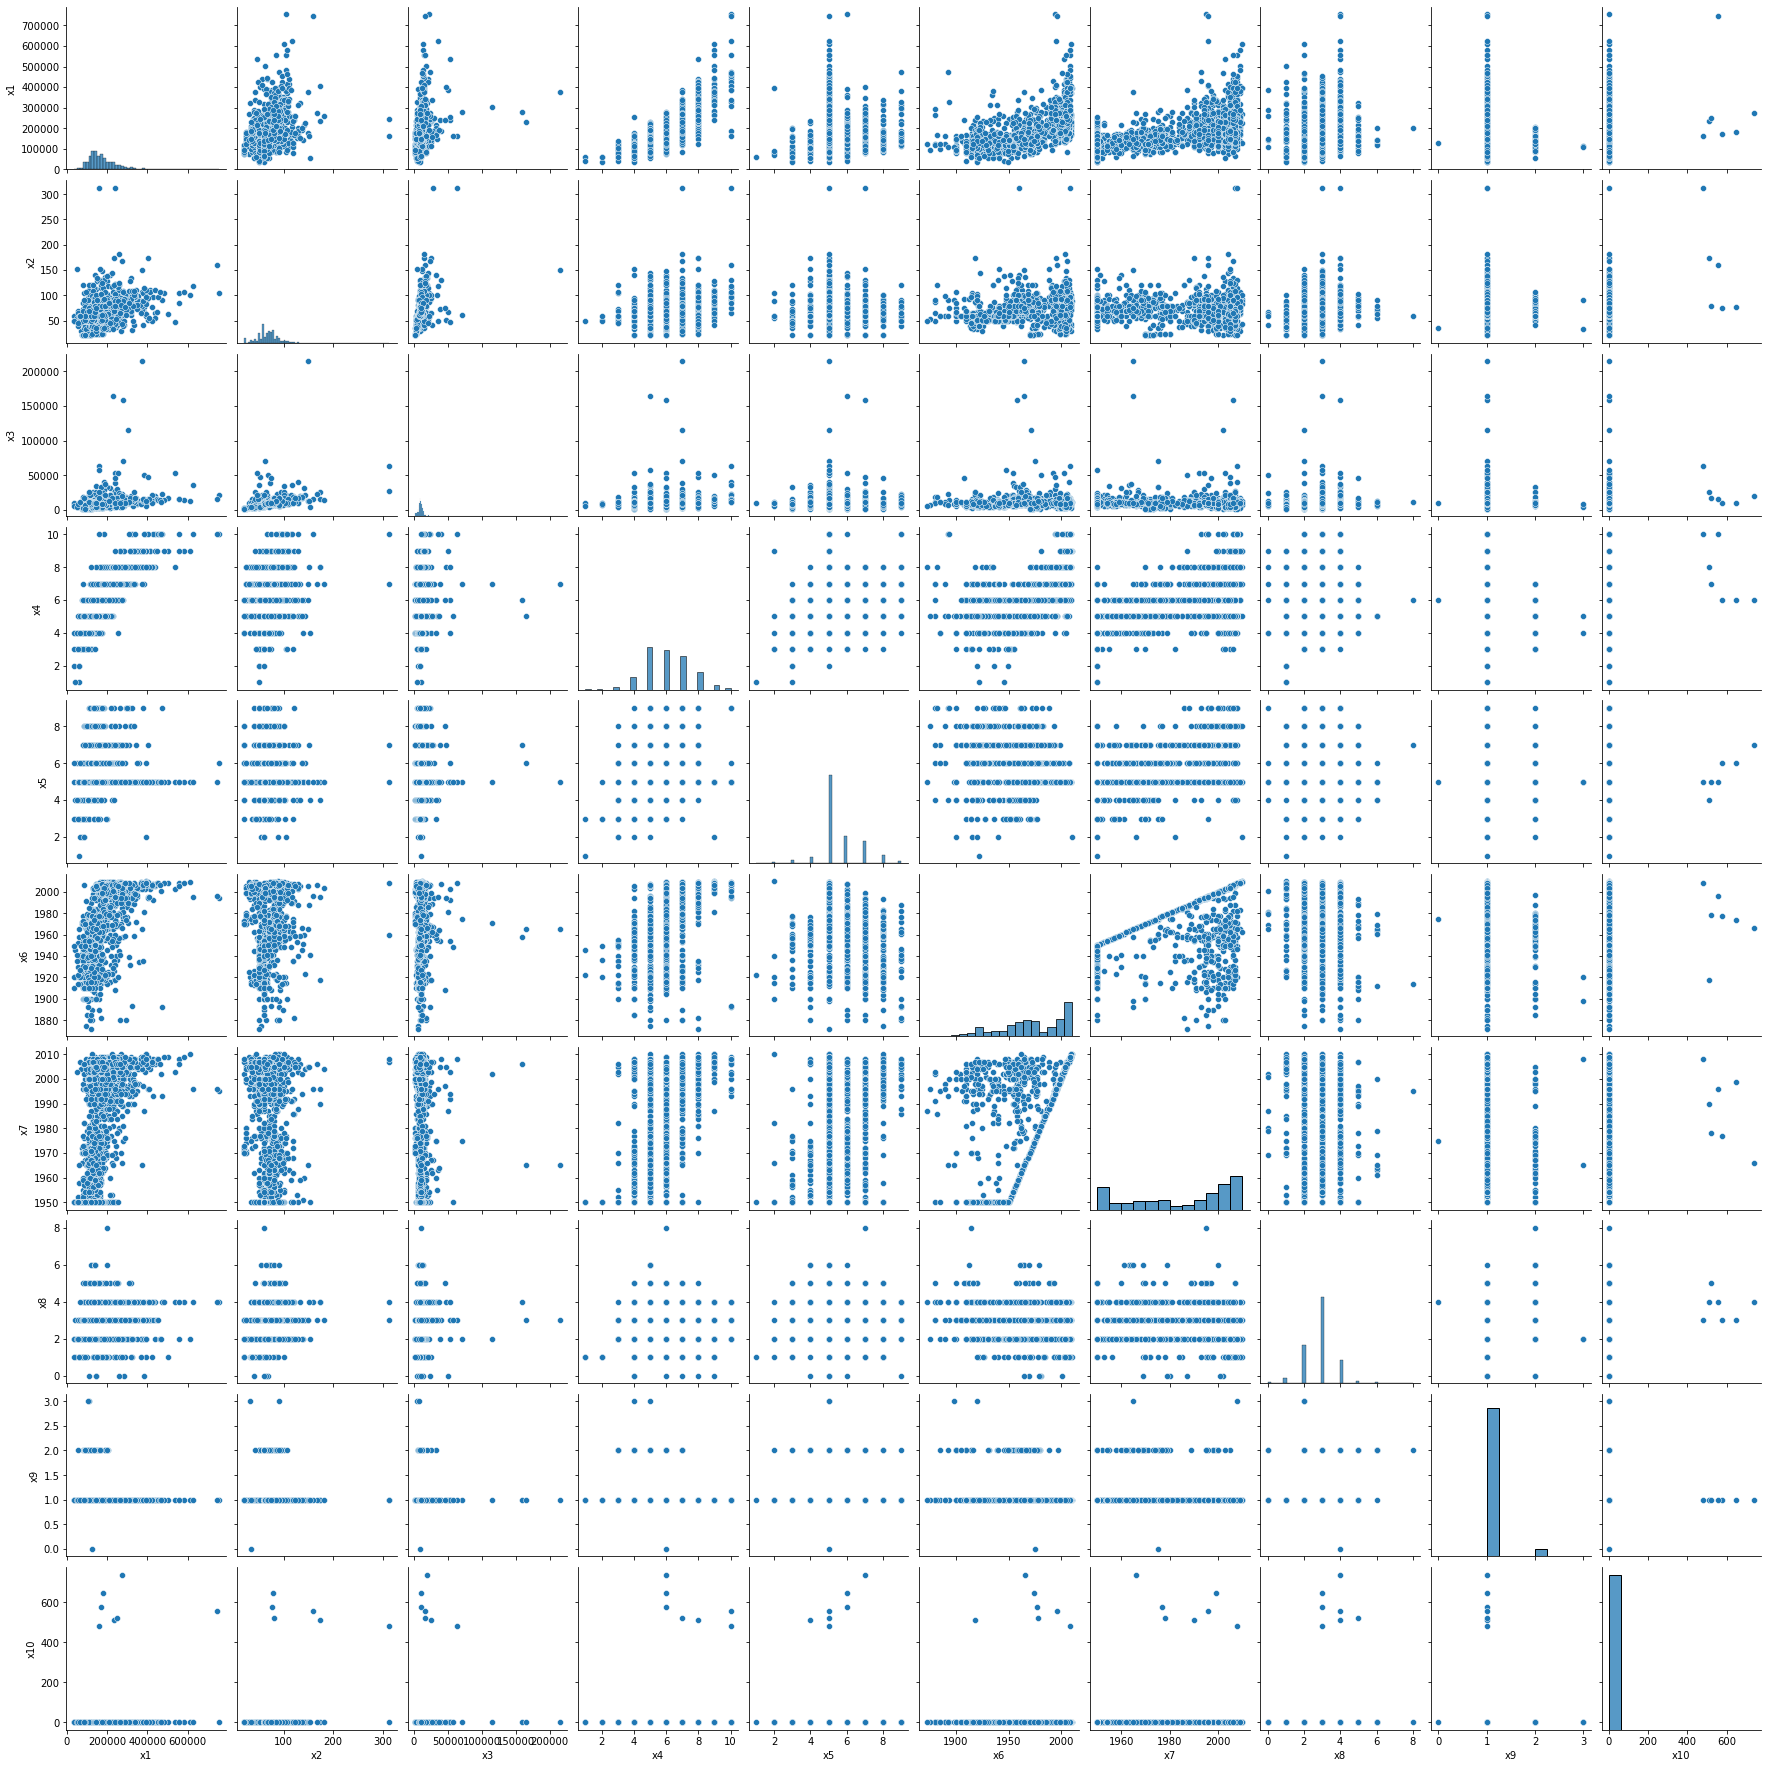

In [61]:
# EDA


import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)


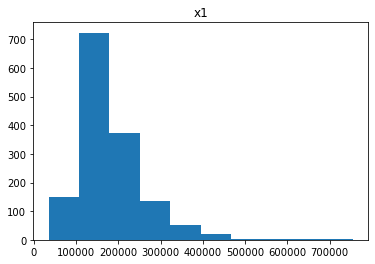

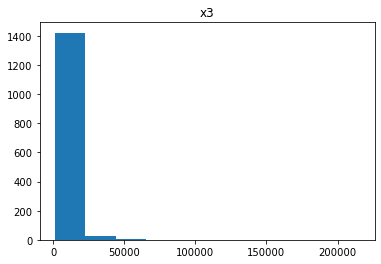

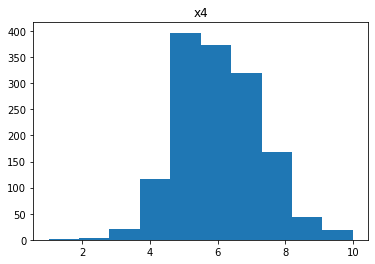

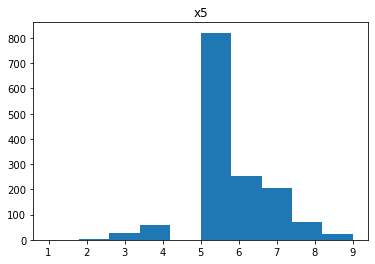

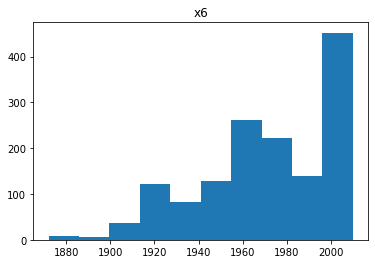

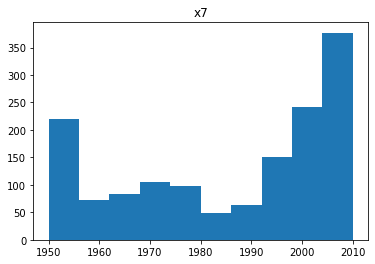

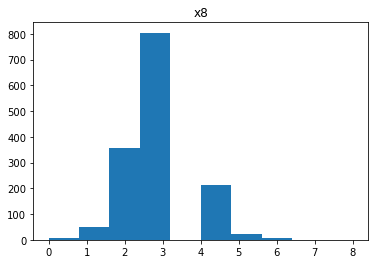

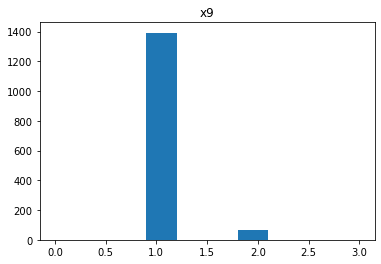

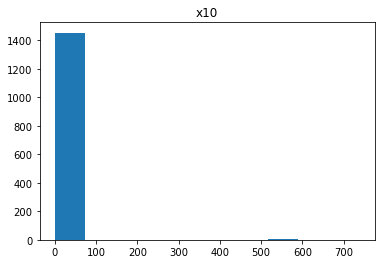

In [62]:
for v in df.select_dtypes(include='int'):
    target = df[v]
    plt.hist(target)
    plt.title(v)
    plt.show()

### -> 변수들 단위가 다르므로 scaling 필요함

In [63]:
df['x2'].isnull().sum()

259

<AxesSubplot:>

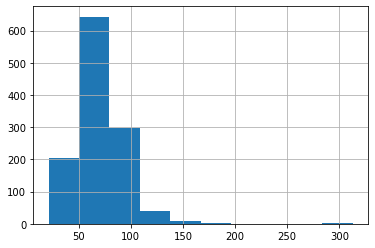

In [64]:
df['x2'].hist() # 한쪽으로 치우쳐있으므로 중앙값(median)으로 대체

In [67]:
# x2의 결측치 채우기 - 중앙값으로 대체 

df['x2'].fillna(df['x2'].median(), inplace=True)

<AxesSubplot:>

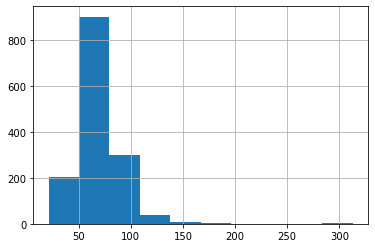

In [72]:
df['x2'].hist() # 중앙값의 빈도가 늘어난것 확인

In [73]:

X = df.drop(columns=['x1'])
y = df['x1']


# scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_sc = sc.fit_transform(X)


In [92]:
# 데이터 8:2로 분할하고 선형회귀 적용하여 결정계수와 RMSE 산출

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=99, test_size=0.2)

In [99]:
### 선형회귀 적용

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)


### 결정계수와 RMSE 산출

from sklearn import metrics
from math import sqrt
import numpy as np

lreg.score(X_test, y_test)

pred_lreg = lreg.predict(X_test)

print('선형회귀 - 결정계수: ', metrics.r2_score(y_test, pred_lreg), '\n')
print('선형회귀 - MSE: ', metrics.mean_squared_error(y_test, pred_lreg), '\n') 
print('선형회귀 - RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred_lreg)), '\n') 
print('선형회귀 - MAE: ', metrics.mean_absolute_error(y_test, pred_lreg), '\n')   

선형회귀 - 결정계수:  0.7238174579912402 

선형회귀 - MSE:  1362637925.2397459 

선형회귀 - RMSE:  36913.92589849725 

선형회귀 - MAE:  27483.604486079257 



In [106]:
### 릿지 회귀 적용 
### 알파값을 0부터 1까지 0.1단위로 모두 탐색하여 
### 결정계수가 가장 높을때의 알파값 찾아내고 
### 해당 알파로 다시 모델을 학습해서 결정계수와 RMSE 계산


### Ridge - 계수를 제곱한 값을 기준으로 규제 적용 (일반적으로 선호)
### Lasso - 계수의 절대값을 기준으로 규제 적용
### alpha값을 변화시키면서 train / test set의 정확도를 산출
### -> 두개의 정확도가 가장 가까운 시점의 alpha값을 최적값으로 판단



### RidgeCV는 alpha로 넣고자 하는 값들을 리스트로 전달하면 
### 내부적으로 최적의 alpha값을 찾아냄


from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

alphas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

ridgecv = RidgeCV(alphas=alphas, normalize=True, cv=4)

# cv : cross-validation -> 데이터를 k등분한 후 각각에 대하여 검증 진행
# 검증 결과 가장 점수가 높은 모델을 채택
ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
print(f'RMSE: {rmse:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

print(f'alpha: {ridgecv.alpha_}') # 최종 결정된 alpha값
print(f'cv best score: {ridgecv.best_score_}') # 최종 alpha에서의 점수(R^2 of self.predict(X) wrt. y.)
### -> 알파값이 0.1 일때 R2 Score: 0.7251 로 가장 높음

RMSE: 36,914
R2 Score: 0.7238

alpha: 0.0
cv best score: 0.6591341105837678


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

In [119]:
### RidgeCV 사용하지 않고 for 구문으로 알파값 적용할 경우
### https://zara49.tistory.com/64


from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


train_score = []
test_score = []
alphas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    train_score.append(ridge.score(X_train, y_train))
    test_score.append(ridge.score(X_test, y_test))
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    print(f'ridge -  RMSE: {rmse:,.0f}')
    print(f'ridge - R2 Score: {r2:,.4f}\n')

ridge -  RMSE: 36,914
ridge - R2 Score: 0.7238

ridge -  RMSE: 36,932
ridge - R2 Score: 0.7235

ridge -  RMSE: 36,950
ridge - R2 Score: 0.7233

ridge -  RMSE: 36,969
ridge - R2 Score: 0.7230

ridge -  RMSE: 36,988
ridge - R2 Score: 0.7227

ridge -  RMSE: 37,008
ridge - R2 Score: 0.7224

ridge -  RMSE: 37,028
ridge - R2 Score: 0.7221

ridge -  RMSE: 37,048
ridge - R2 Score: 0.7218

ridge -  RMSE: 37,068
ridge - R2 Score: 0.7215

ridge -  RMSE: 37,089
ridge - R2 Score: 0.7212

ridge -  RMSE: 37,110
ridge - R2 Score: 0.7209



Ridge reg. 결과


C:\Users\getou\AppData\Local\Temp/ipykernel_6920/4128188324.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(alphas), train_score)
C:\Users\getou\AppData\Local\Temp/ipykernel_6920/4128188324.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(alphas), test_score)


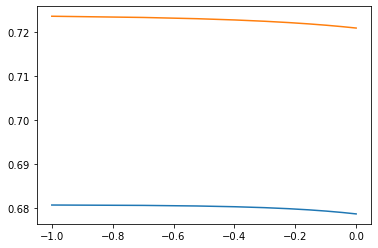

In [117]:
### 결과 시각화 - 로그함수를 통해 확인

import matplotlib.pyplot as plt
print('Ridge reg. 결과')
plt.plot(np.log10(alphas), train_score)
plt.plot(np.log10(alphas), test_score)
plt.show()

In [100]:
### 알파값 0.1 로 다시 모델 학습 하여 결정계수와 RMSE 산출

alphas = [0.1]

# Ridge의 경우 alpha값을 이와 같이 따로 따로 넣어주어야 함
for alpha in alphas:
  ridge = Ridge(alpha=alpha, normalize=True)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)

  mse = metrics.mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = metrics.r2_score(y_test, y_pred)
  print(f'Test RMSE: {rmse:,.0f}')
  print(f'R2 Score: {r2:,.4f}\n')


Test RMSE: 36,831
R2 Score: 0.7251



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [111]:
### 라쏘 회귀 적용으로 위와 동일한 결과물 산출


from sklearn.linear_model import Lasso

train_score = []
test_score = []
alphas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    train_score.append(lasso.score(X_train, y_train))
    test_score.append(lasso.score(X_test, y_test))
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    print(f'lasso -  RMSE: {rmse:,.0f}')
    print(f'lasso - R2 Score: {r2:,.4f}\n')

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238

lasso -  RMSE: 36,914
lasso - R2 Score: 0.7238



C:\Users\getou\AppData\Local\Temp/ipykernel_6920/957823610.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+12, tolerance: 7.756e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso reg. 결과


C:\Users\getou\AppData\Local\Temp/ipykernel_6920/3657906363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(alphas), train_score)
C:\Users\getou\AppData\Local\Temp/ipykernel_6920/3657906363.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(alphas), test_score)


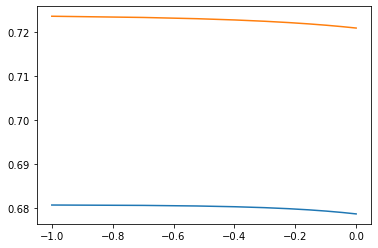

In [118]:
import matplotlib.pyplot as plt
print('Lasso reg. 결과')
plt.plot(np.log10(alphas), train_score)
plt.plot(np.log10(alphas), test_score)
plt.show()

In [ ]:
### 회귀모델 평가지표 

# MSE (mean sqaured error 평균제곱오차)
# - 예측값과 실제값의 차이 (잔차) 의 평균값 (작으면 작을수록 좋음)
# - 제곱값이므로 기존값과 다른 단위를 가짐 
# - 이상치 있는 경우 왜곡될 수 있음
#   (이상치로 인한 오차가 클수록 그에 따른 가중치가 높게 반영됨)
# - 제곱값이므로 양수여서 예측결과가 실제보다 높은지 낮은지 알수 없음
# - 값의 스케일에 의존적 (=예측하고자 하는 값의 단위에 영향을 많이 받음)

from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_pred)


# RMSE (root MSE 평균제곱근오차)
# - MSE값의 제곱근
# - 각각의 잔차에 대한 제곱근이 아니라 MSE의 루트값이므로 제곱에 의한 왜곡은 여전히 존재
#    (MSE보다는 덜함)

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)


# MSLE (mean squared log error   MSE에 로그 적용한 지표)
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_pred)



# MAE (mean average error 평균절대오차)
# - 잔차에 절대값 씌운 후 평균을 낸 것
# - 절대값만 씌운것이므로 기존 값의 단위를 그대로 유지 
# - MSE에 비해 이상치에 의한 왜곡이 덜함
# - 절대값이므로 양수여서 예측결과가 실제보다 높은지 낮은지 알수 없음

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)



# MAPE (mean absolute percentage error)
# - MAE 를 퍼센트로 변환
# - MAE와 같은 단점이 있고 모델에 대한 편향이 존재함

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
MAPE(y_test, y_pred)



# MPE (mean percentage error)
# - MAPE 에서 절대값을 제외한 지표
# - 모델이 underperformance(+) 인지 overperformance(-) 인지 판단

def MAE(y_test, y_pred): 
    return np.mean((y_test - y_pred) / y_test) * 100)
    
MAE(y_test, y_pred)



# R^2 (r-sqaured  결정계수)
# - 실제값의 분산과 예측값의 분산을 비교하여 예측이 얼마나 잘 맞았는지 보는것
# - 1에 가까울수록 성능이 좋음
# - 결정계수값이 0.7 이라면, 모델이 실제값의 분산을 70% 설명한다는 의미
# - 0과 1사이의 값이므로 스케일에 의존적이지 않음
# - 과적합 문제에 약하다는 단점이 있음
#   (feature 많아질수록 train 성능은 좋지만 test 성능은 안좋을 수 있음)
# - 결정계수는 수치일 뿐이고 모델이 과적합인지 아닌지는 말해주지 않음

r2 = metrics.r2_score(y_test, y_pred)
    


# adj.R^2  
# - R^2 이 과적합 문제에 약하다는 단점을 보완하기 위한 지표


